In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Load the input train.csv dataset

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

# Analyse the data in train to figure out any possible patterns

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

train.groupby('Sex')['Survived'].sum()/ train.groupby('Sex')['Survived'].count()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [4]:
train.groupby('Pclass')['Survived'].sum()/ train.groupby('Pclass')['Survived'].count()
# train.head()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [5]:
train.groupby('SibSp')['Survived'].sum()/ train.groupby('SibSp')['Survived'].count()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [6]:
train.groupby('Parch')['Survived'].sum()/ train.groupby('Parch')['Survived'].count()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

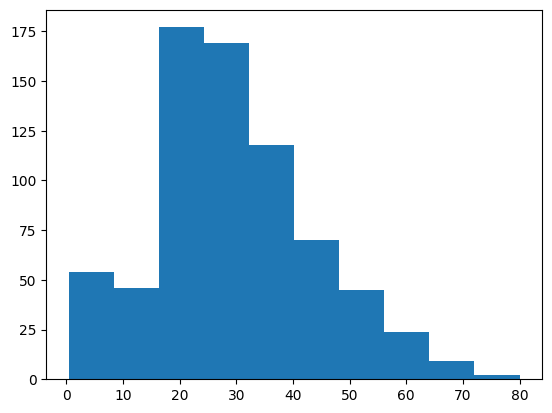

In [7]:

plt.hist(train['Age'])

<Axes: xlabel='Age', ylabel='Fare'>

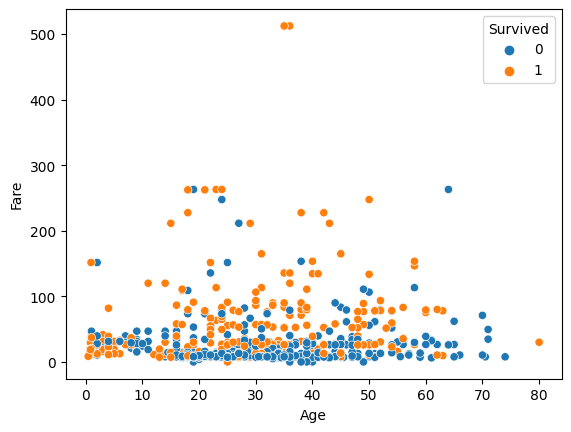

In [8]:
sns.scatterplot(data = train, x = 'Age', y = 'Fare', hue = 'Survived')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

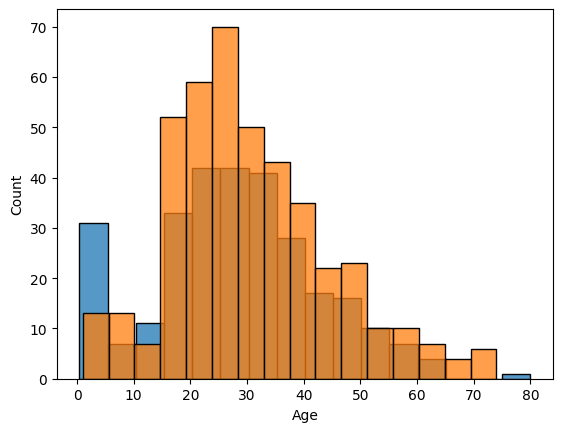

In [9]:
survived = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]
sns.histplot(x = 'Age', data = survived)
sns.histplot(x = 'Age', data = dead)
# No correlation with Age

# Encoding Categorical Variables

In [10]:
from sklearn.preprocessing import LabelEncoder as LE
encoder = LE()
train['Sex_encoded'] = encoder.fit_transform(X = train['Sex'])
test['Sex_encoded'] = encoder.transform(X = test['Sex'])

In [11]:
from sklearn.linear_model import LogisticRegression as LR
linear_model = LR()
features = ['Sex_encoded', 'Parch', 'SibSp', 'Pclass']
linear_model.fit(X = train[features], y = train['Survived'])


LogisticRegression()

In [12]:
y_pred = linear_model.predict(test[features])

In [13]:
y_pred = pd.DataFrame(y_pred, columns = ['Survived'])
y_pred['PassengerId'] = test['PassengerId']

In [14]:
y_pred.to_csv('submission.csv', index = False)